## Observations and Insights 

•Among tested drug regimens including placebo, Ramicane seems to be the most effective in reducing tumor growth, showing lower the median value.

•Mice treated with Capomulin demonstrated the highest survival rate compared to the mice treated with the other eight treatment regimens used in the study (Fig. 1). Capomulin has the second lowest tumor volume median after Ramicane (Table 2). Survival rate of Ramicane regimen comes after Capomulin, however, its efficacy in the tumor volume reduction over the period of study is the highest out of all analyzed treatments.

•Mice gender did not demonstrate any effect on efficacy of the studded treatments. Mice population used in the study had 51 % of male mice versus 49 % of female mice (Fig. 3) and decrease or increase in the tumor volume was demonstrated in both genders equally and depended only on the type of a regimen being used as a treatment.

•The final tumor volume measurements of mice treated with Capomulin and Ramicane showed that two mice out of twenty-five treated with Capomulin developed an increase in the tumor growth volume (Table.4), while all twenty-five mice treated with Ramicane had reduction in the tumor volume.

•The observation of correlation between body weight and average tumor volume among mice treated with Capomulin showed that tumor volume is directly related to the weight of a tumor-bearing mouse.

•The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is sound to predict the data from the model.

•Capomulin treated mice demonstrated strong improvement in the tumor volume  among others and out of all analyzed regimens Capomulin provided second best results after Ramicane regimen. More study needs to be done to have a farther analysis.



In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Table.1

In [157]:
# Checking the number of mice.
mice=combined_dataset["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [158]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_by_ID = combined_dataset.groupby(["Mouse ID"])
duplicates = grouped_by_ID["Timepoint"].value_counts()
duplicates_df = duplicates.to_frame()
duplicates = duplicates_df.loc[(duplicates_df["Timepoint"]>1)]
duplicates

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [67]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_dataset[combined_dataset["Mouse ID"] =="g989"]
duplicate_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


Table.2

In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_dataset[combined_dataset["Mouse ID"] !="g989"]

In [69]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice=cleaned_df["Mouse ID"].value_counts()
cleaned_number_of_mice=len(cleaned_mice)
cleaned_number_of_mice

248

## Summary Statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

  #Get average/mean of tumor volume
tmv_regimen_mean = cleaned_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
tmv_regimen_mean

# Get the median of tumor volume
tmv_regimen_median = cleaned_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
tmv_regimen_median

# Get the variance of tumor volume
tmv_regimen_variance = cleaned_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
tmv_regimen_variance

# Get the standard deviation(std)of tumor volume
tmv_regimen_std = cleaned_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
tmv_regimen_std
# Get the standard error of the mean(SEM) of tumor volume
tmv_regimen_sem = cleaned_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
tmv_regimen_sem


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stat_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stat_table

summary_stat_table.to_csv("statfile.csv", index=False, header=True)



In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
single_group_by = cleaned_df.groupby('Drug Regimen')
summary_stat_table = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stat_table

#Create a new dataframe with new explainatory information

Drug_summary = pd.DataFrame({ "Mean Tumor Volume":tmv_regimen_mean, 
                                    "Median Tumor Volume": tmv_regimen_median, 
                                    "Variance Tumor Volume": tmv_regimen_variance, 
                                    "Standard Deviation Tumor Volume": tmv_regimen_std,
                                     "SEM Tumor Volume":tmv_regimen_sem
                             })

Drug_summary
    

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Table.3

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

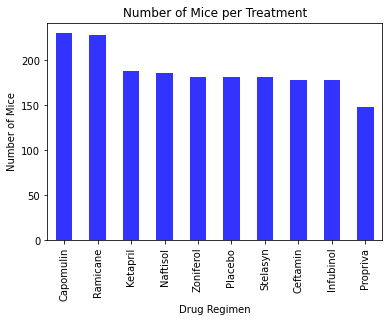

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
 #first we create a group series using the 'Drug Regimen' column and, counting the number of data points for each Drug Regimen 
mice_count = cleaned_df["Drug Regimen"].value_counts()
mice_count

 # Create a Pandas bar plot based off of the group series from before and label the title by class method
plot_pandas = mice_count.plot.bar(color='b',alpha = 0.8)  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

Fig.1

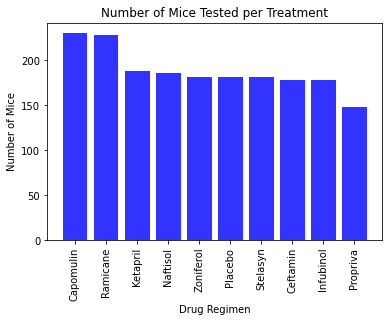

In [73]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
   #setting x_axis and y_axis
x_axis = mice_count.index.values
y_axis = mice_count.values
   # Create a Pyplot bar plot based on group series from before and label the title and set x,y labels
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()


Fig.2

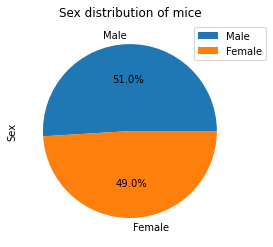

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = cleaned_df["Sex"].value_counts()
plt.title("Sex distribution of mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))
plt.savefig("../pie1.png", bbox_inches = "tight")
plt.show()

Fig.3

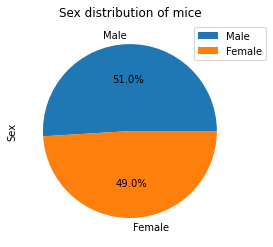

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Sex distribution of mice")
plt.ylabel("Sex")
plt.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))
plt.savefig("../pie2.png", bbox_inches = "tight")
plt.show()

Fig.4

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 


    

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [119]:
# Merge this group df with the original dataframe to get the tumor volume(tv) at the last timepoint
tv_df = pd.merge(max_timepoint , cleaned_df, on=(["Mouse ID","Timepoint"]))
tv_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


Table.4

In [120]:
 #Put treatments into a list for loop (and later for plot labels)
 #Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes for treatment in treatments: 
for treatment in treatments:
    tv_regimen = tv_df.loc[tv_df["Drug Regimen"] == treatment]
    tumor_vol= tv_regimen['Tumor Volume (mm3)']
    
#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)


In [122]:

# Calculate the IQR and quantitatively determine if there are any potential outliers

quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")


For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


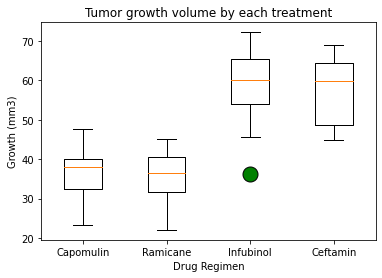

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='g', markersize=15,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth volume by each treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()

Fig.5

## Line and Scatter Plots

In [129]:
# Generate a line plot of tumor volume vs time point for a mouse treated with Capomulin
    #Find the mouse treated with Capomulin 
    # list of mice treated with Capomulin     
capomulin_mice = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")


Mouse ID
y793    10
x401    10
b742    10
g288    10
g316    10
i557    10
i738    10
j119    10
l509    10
l897    10
m601    10
m957    10
r554    10
r944    10
s185    10
s710    10
t565    10
u364    10
v923    10
w914    10
b128    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

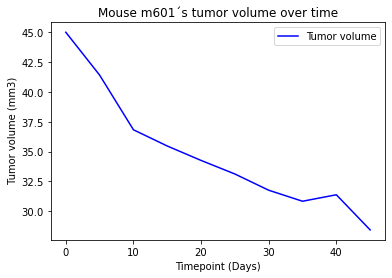

In [137]:
#Pull out data for single mouse, I chose mice j119
Mouse_m601 = cleaned_df.loc[cleaned_df["Mouse ID"] == "m601"]

tumor_y = Mouse_m601["Tumor Volume (mm3)"]
time_x = Mouse_m601["Timepoint"]

# Plot our line that will be used to 
plt.plot(time_x, tumor_y, color="blue", label="Tumor volume", linestyle = "solid")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse m601´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()

Fig.6

Text(0, 0.5, 'Tumor volume (mm3)')

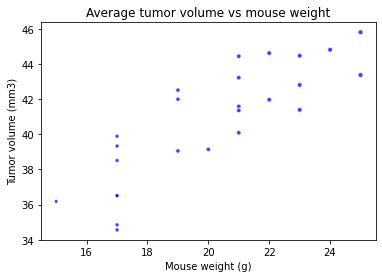

In [155]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Get average tumor volumen
#All capomulin mice are in capomulin_mice ( used in immediate above excercise)
capomulin_group =capomulin_mice.groupby(["Mouse ID"]).mean()
capomulin_group.head()

avg_tumor_vol = capomulin_group["Weight (g)"]
avg_weight = capomulin_group["Tumor Volume (mm3)"]

#Create scatterplot 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="blue", edgecolors="white",
            s=avg_tumor_vol, alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

Fig.7

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


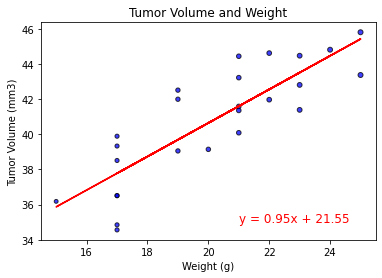

In [159]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
   #set x and y
x_values = capomulin_group["Weight (g)"]
y_values = capomulin_group["Tumor Volume (mm3)"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)
plt.title("Tumor Volume and Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#plot line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(21,35),fontsize=12,color="red")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
  

Fig.8